# Insurance Analysis

## Importing data

In [2]:
# Visual Python: Data Analysis > Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# Visual Python: Data Analysis > File
df = pd.read_csv('./Dataset/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
# Visual Python: Logic > code
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Visual Python: Logic > code
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [21]:
# Visual Python: Data Analysis > Frame
df = df.astype({'children': 'category'})
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
# Visual Python: Data Analysis > Subset
x = df.loc[(df.index), ['age','sex','bmi','children','smoker','region']]
x

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [8]:
# Visual Python: Data Analysis > Subset
y = df.loc[(df.index), 'charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## Data Visualization

In [10]:
# Visual Python: Logic > code
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rc('figure', figsize=(12, 8))

from matplotlib import rcParams
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

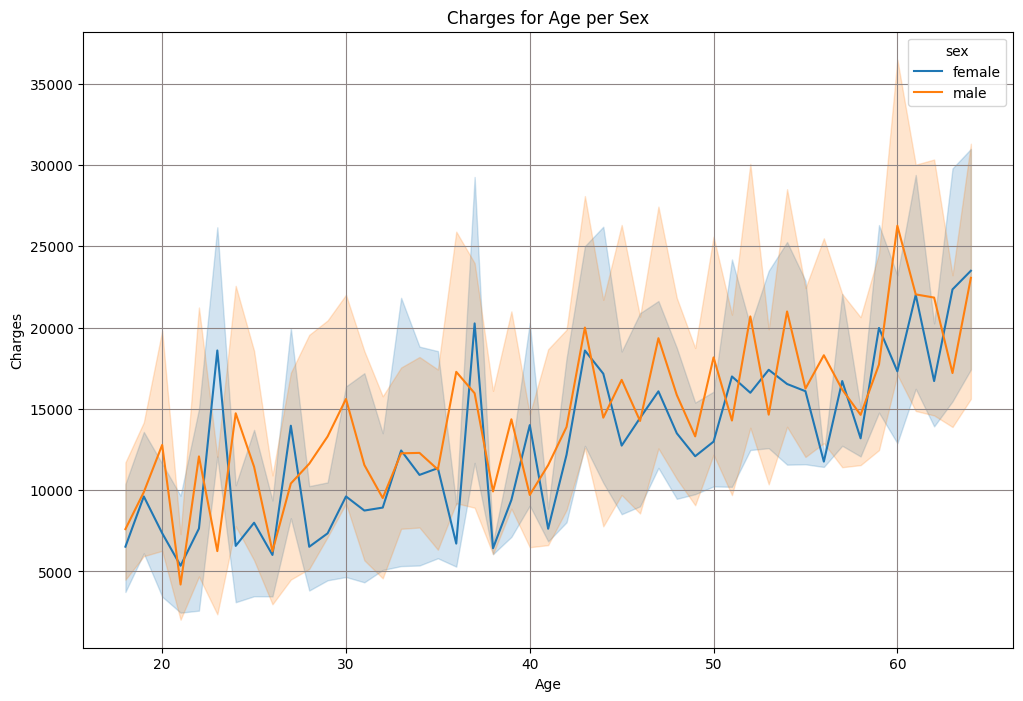

In [11]:
# Visual Python: Visualization > Seaborn
sns.lineplot(data=df, x='age', y='charges', hue='sex')
plt.title('Charges for Age per Sex')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid(True, color='#8e8585')
plt.show()

In [15]:
# Visual Python: Visualization > Seaborn
def vp_seaborn_show_values(axs, precision=1, space=0.01):
    pstr = '{:.' + str(precision) + 'f}'
    
    def _single(ax):
        # check orient
        orient = 'v'
        if len(ax.patches) == 1:
            # check if 0
            if ax.patches[0].get_x() == 0:
                orient = 'h'
        else:
            # compare 0, 1 patches
            p0 = ax.patches[0]
            p1 = ax.patches[1]
            if p0.get_x() == p1.get_x():
                orient = 'h'
                
        if orient == 'v':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*space)
                if not np.isnan(_x) and not np.isnan(_y):
                    value = pstr.format(p.get_height())
                    ax.text(_x, _y, value, ha='center') 
        elif orient == 'h':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + (space - 0.01)
                _y = p.get_y() + p.get_height() / 2
                if not np.isnan(_x) and not np.isnan(_y):
                    value = pstr.format(p.get_width())
                    ax.text(_x, _y, value, ha='left')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

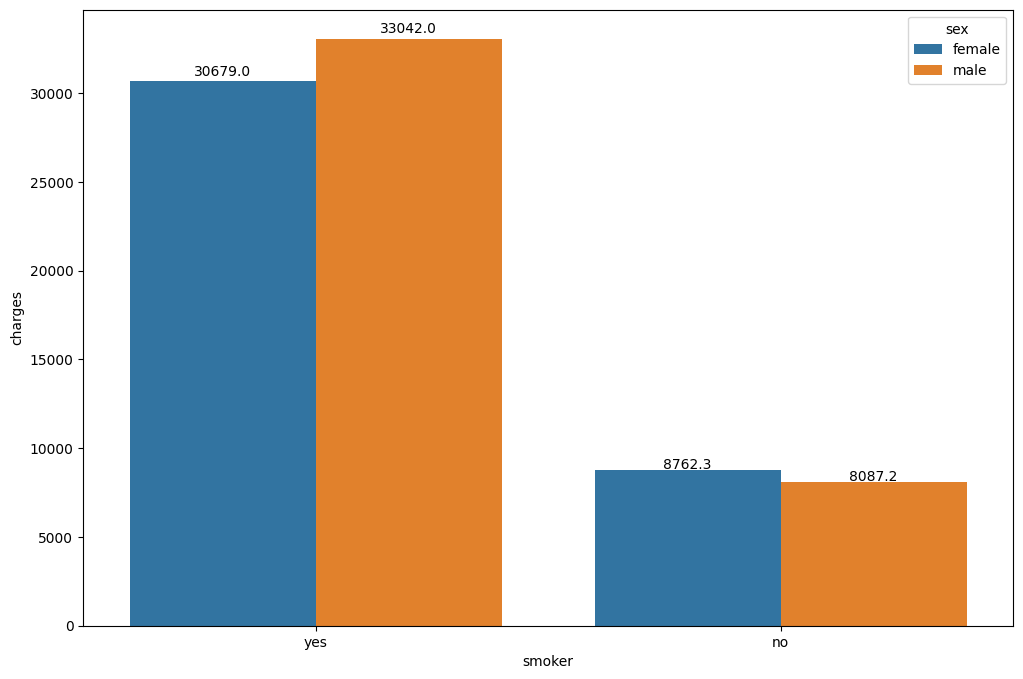

In [16]:
# Visual Python: Visualization > Seaborn
ax = sns.barplot(data=df, x='smoker', y='charges', hue='sex', errorbar=None)
vp_seaborn_show_values(ax)
plt.show()

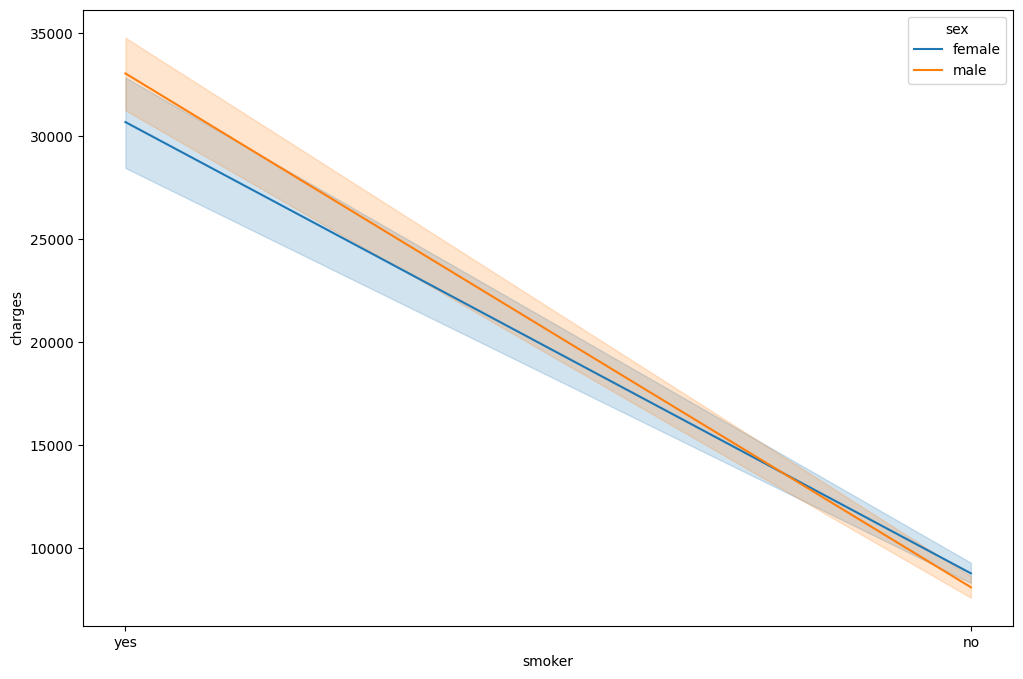

In [17]:
# Visual Python: Visualization > Seaborn
sns.lineplot(data=df, x='smoker', y='charges', hue='sex')
plt.show()

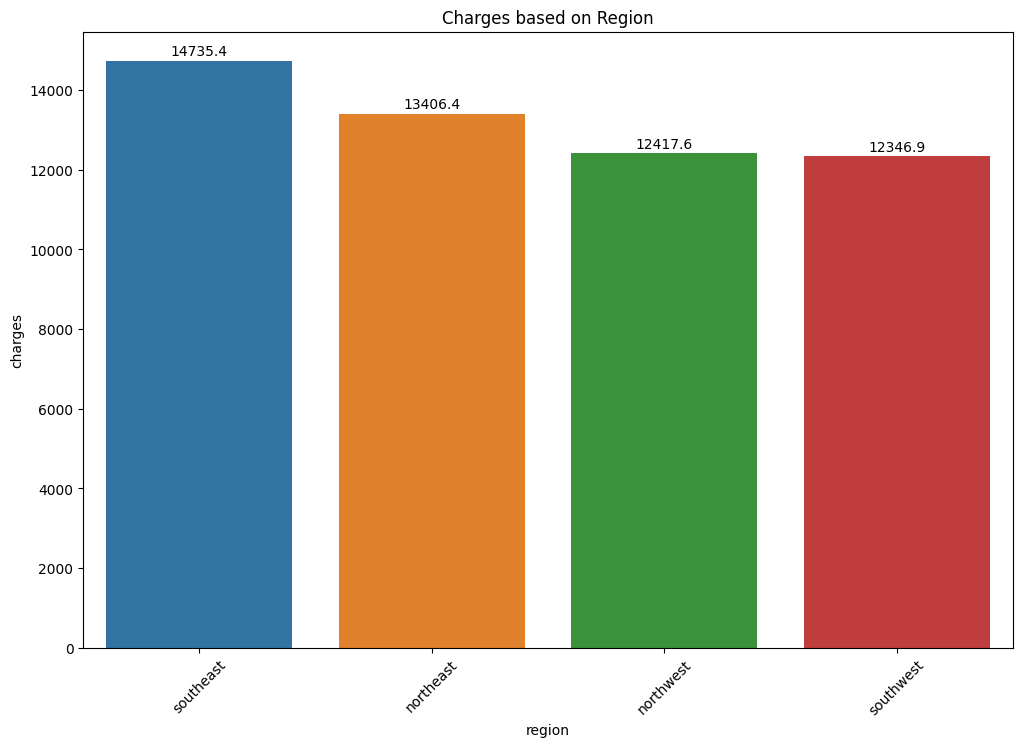

In [18]:
# Visual Python: Visualization > Seaborn
ax = sns.barplot(data=df, x='region', y='charges', errorbar=None,
                 order=df.groupby('region')['charges'].mean(numeric_only=True).sort_values(ascending=False).index)
vp_seaborn_show_values(ax)
plt.xticks(rotation=45)
plt.title('Charges based on Region')
plt.show()

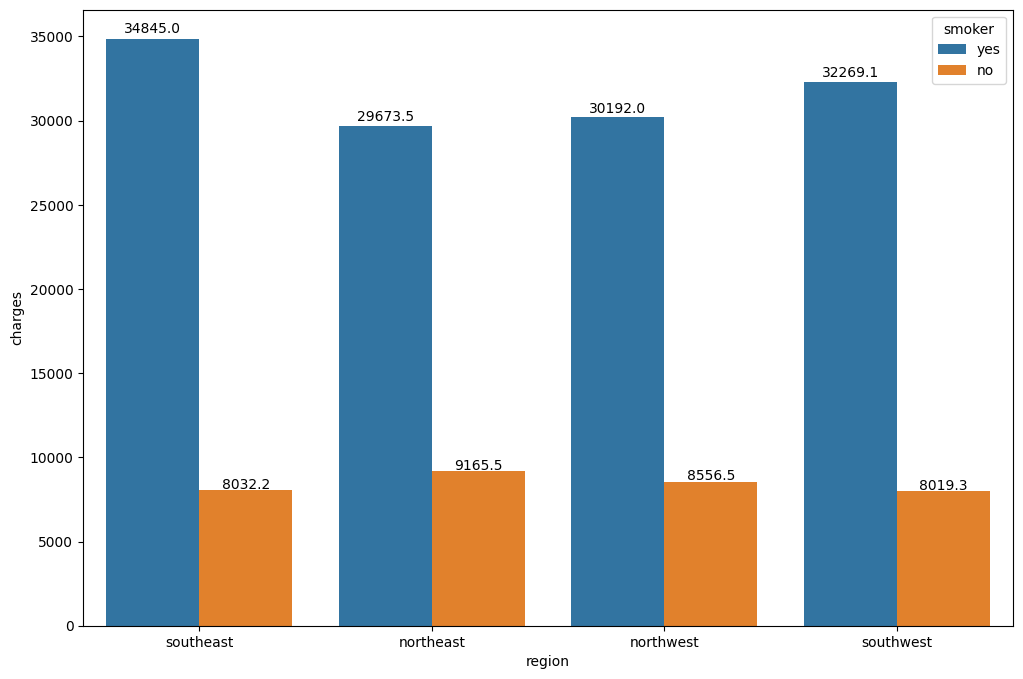

In [20]:
# Visual Python: Visualization > Seaborn
ax = sns.barplot(data=df,
                 x='region',
                 y='charges',
                 hue='smoker',
                 errorbar=None,
                 order=df.groupby('region')['charges'].mean(numeric_only=True).sort_values(ascending=False).index)
vp_seaborn_show_values(ax)
plt.show()

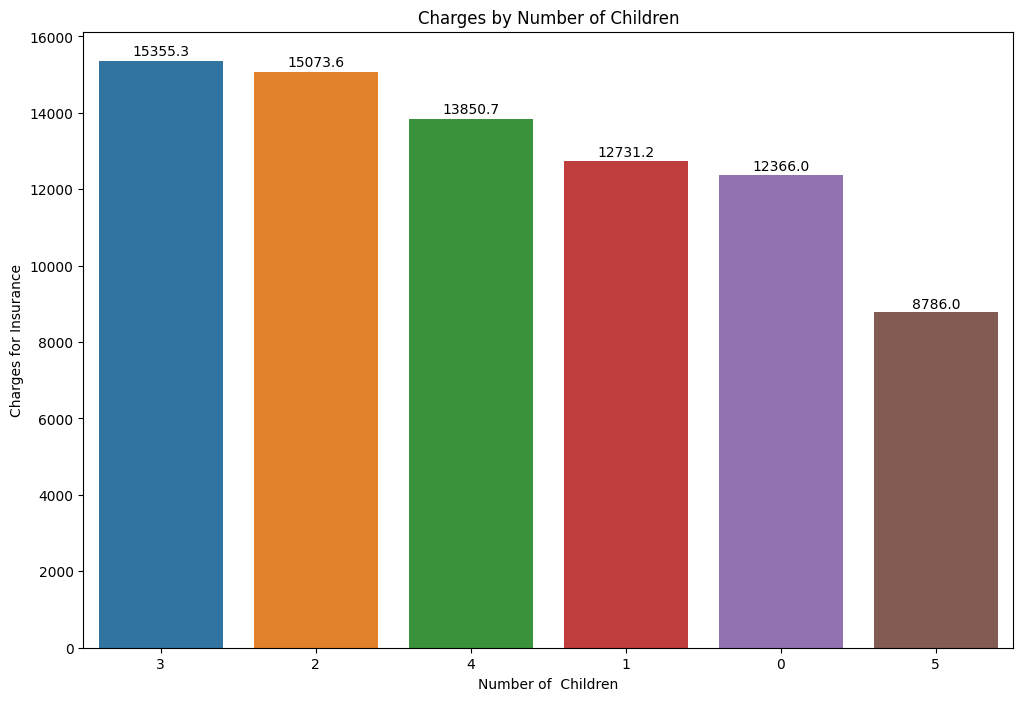

In [22]:
# Visual Python: Visualization > Seaborn
ax = sns.barplot(data=df, x='children', y='charges', errorbar=None, order=df.groupby('children')['charges'].mean(numeric_only=True).sort_values(ascending=False).index)
vp_seaborn_show_values(ax)
plt.title('Charges by Number of Children')
plt.xlabel('Number of  Children')
plt.ylabel('Charges for Insurance')
plt.show()